# Extracting Benchmark audio features

In [ ]:
!pip install soundfile
!pip install numpy
!pip install scipy
!pip install librosa

In [27]:
import soundfile as sf
import numpy as np
from scipy import signal
import librosa.feature as feat

In [29]:
filename = "audio_example.wav"
audio, sr = sf.read(filename)

sos = signal.butter(6, [5000, 100000], 'bandpass', fs=sr, output='sos')
sig = signal.sosfiltfilt(sos, audio)
rms = feat.rms(y=sig) 
sc = feat.spectral_centroid(y=sig, sr=sr)
sb = feat.spectral_bandwidth(y=sig,sr=sr)
sfs = feat.spectral_flatness(y=sig)

features = [np.mean(rms), np.std(rms), np.min(rms), np.max(rms),\
            np.mean(sc), np.std(sc), np.min(sc), np.max(sc),\
            np.mean(sb), np.std(sb), np.min(sb), np.max(sb),\
            np.mean(sfs), np.std(sfs), np.min(sfs), np.max(sfs)]

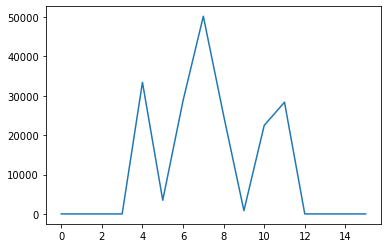

In [31]:
import matplotlib.pyplot as plt
plt.plot(features)